## Creating groupings

In [31]:
import pandas as pd

data = pd.read_csv('data/aluguel_residencial.csv', sep = ';')

data.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,1700.0,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,800.0,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,800.0,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1300.0,Apartamento


In [32]:
# Remerbering mean

data['Valor'].mean()

5046.172821405663

## Grouping one

In [33]:
# Creating bairros list for realize exercicie
# this case i choose 5 bairros randons

bairros = data['Bairro'].unique()
bairros = bairros[25: 30]

In [34]:
type(bairros) # -> ndarray

# Selectioning and creating a new dataframe with only districts that is in "bairros"
selection = data['Bairro'].isin(bairros)
data_selection = data[selection]
data_selection.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
57,Casa,São Conrado,4,2,4,730,28000.0,2000.0,12000.0,28000.0,Casa
62,Apartamento,Vila Valqueire,2,1,0,45,800.0,280.0,14.0,800.0,Apartamento
63,Apartamento,Gávea,2,1,0,70,2800.0,680.0,98.0,2800.0,Apartamento
66,Apartamento,Cosme Velho,3,4,0,130,5500.0,1407.0,246.0,5500.0,Apartamento
67,Apartamento,Bonsucesso,2,1,0,77,1500.0,740.0,0.0,1500.0,Apartamento


In [35]:
# creating a groupby

district_group = data_selection.groupby('Bairro')

type(district_group) 

pandas.core.groupby.generic.DataFrameGroupBy

In [36]:
# visualizing the groupby created above

district_group.groups

{'Bonsucesso': [67, 264, 367, 714, 918, 1288, 1459, 1512, 2064, 2219, 2668, 2678, 3058, 3233, 3258, 4130, 4259, 4353, 4925, 5140, 5451, 5630, 6731, 6866, 7584, 7733, 7977, 8607, 9784, 9888, 10037, 10430, 11447, 11863, 12338, 12356, 12371, 12905, 12923, 14931, 14942, 14959, 15378, 15983, 16148, 16464, 16610, 16889, 16960, 17022, 17420, 17786, 18086, 18890, 18970, 18994, 19652, 20593, 20926], 'Cosme Velho': [66, 1057, 1561, 1599, 2706, 4189, 4659, 5432, 6574, 7467, 7957, 9409, 9741, 9850, 10978, 11008, 11046, 12796, 14613, 14974, 15012, 15014, 15567, 16160, 16669, 17201, 17302, 17845, 18096, 19500, 21207], 'Gávea': [63, 108, 215, 226, 243, 298, 461, 520, 536, 857, 1105, 1149, 1159, 1293, 1316, 1334, 1384, 1430, 1612, 1626, 1631, 2046, 2078, 2092, 2108, 2113, 2231, 2330, 2429, 2497, 2617, 2620, 2646, 2658, 2852, 2952, 2968, 3065, 3193, 3225, 3381, 3451, 3453, 3704, 3946, 4017, 4143, 4277, 4341, 4392, 4404, 4604, 4694, 4803, 4945, 4955, 4992, 5115, 5143, 5393, 5485, 5520, 5757, 5819, 5902,

In [37]:
# This groupby is formed by several dataFrames
# Each dataFrame is compound with all bairro data

for bairro, data_district in district_group:
    print(type(data_district))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [38]:
# We could see the value media by district with for

print('Average value for each district : ')
for bairro, data_district in district_group:
    print(f'{bairro}: {data_district["Valor"].mean(): .2f}')

Average value for each district : 
Bonsucesso:  1225.93
Cosme Velho:  5343.55
Gávea:  6563.69
São Conrado:  8780.89
Vila Valqueire:  1769.58


In [39]:
# but, is more easy this mode:

district_group[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Bonsucesso,1225.93,313.12
Cosme Velho,5343.55,999.03
Gávea,6563.69,1187.02
São Conrado,8780.89,2936.06
Vila Valqueire,1769.58,276.88


## descriptive statistics

In [40]:
district_group['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Bonsucesso,59.0,1225.93,617.23,600.0,925.0,1100.0,1350.0,4500.0
Cosme Velho,31.0,5343.55,4496.12,1200.0,2600.0,3300.0,6000.0,15000.0
Gávea,215.0,6563.69,6086.73,1500.0,3000.0,4500.0,6925.0,30000.0
São Conrado,259.0,8780.89,7156.52,1400.0,3500.0,6000.0,11749.5,45000.0
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0


In [41]:
district_group['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'minimo', 'max': 'maximo', 'sum': 'soma'})

,minimo,maximo,soma
Bairro,,,
Bonsucesso,600.0,4500.0,72330.0
Cosme Velho,1200.0,15000.0,165650.0
Gávea,1500.0,30000.0,1411193.0
São Conrado,1400.0,45000.0,2274250.0
Vila Valqueire,800.0,16000.0,84940.0


## matplotlib

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

In [ ]:
data_test = data.groupby('Bairro')

In [50]:
fig = data_test['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor medio do Aluguel por bairro', {'fontsize': 22})

NameError: name 'data_test' is not defined

Text(0.5, 1.0, 'Valor medio do Aluguel por bairro')

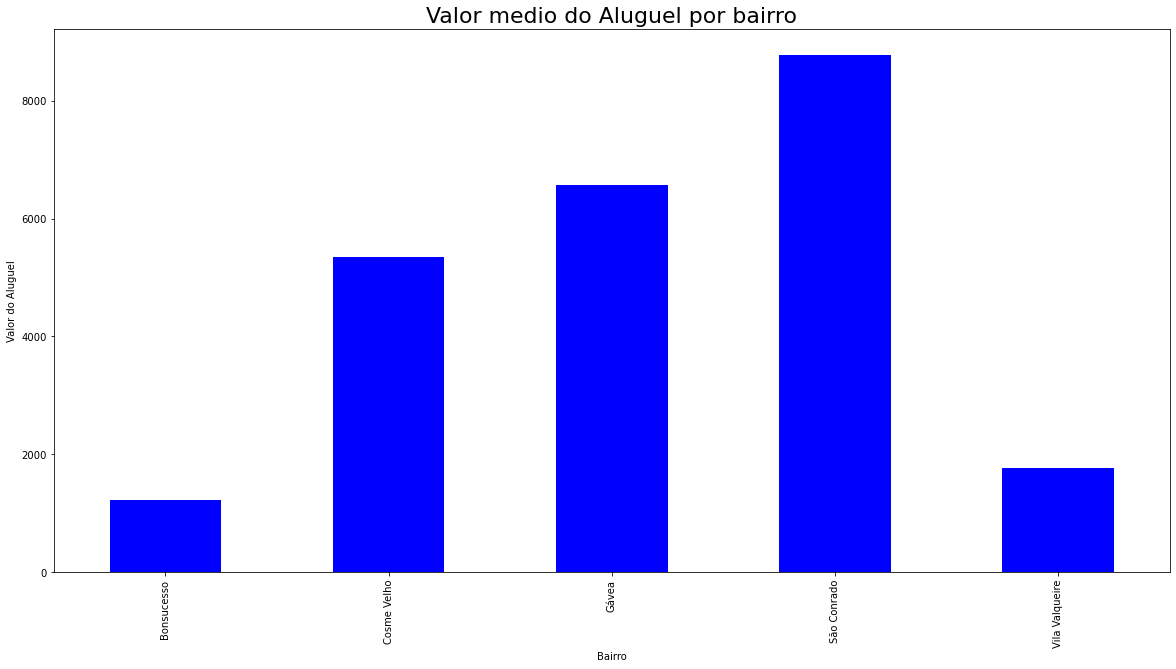

In [51]:
fig = district_group['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor medio do Aluguel por bairro', {'fontsize': 22})

## Exercicie
### 1) get a DataFrame with the students' average grades, to two decimal places, according to their gender?

In [44]:
import pandas as pd
students = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])


In [45]:
students

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [46]:
gender = students.groupby('Sexo')

In [47]:
mean_sudents = pd.DataFrame(gender['Notas'].mean().round(2))
mean_sudents.columns = ['Media']
mean_sudents

,Media
Sexo,
F,5.82
M,7.12


### 2) generating dataframe

In [52]:
prices = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
prices

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [62]:
produtos = prices.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [67]:
# agg -> aggregate

produtos_info = produtos['Preço'].agg(['mean', 'std', 'min', 'max']).rename(columns = {
    'mean': 'Media', 
    'std': 'Desvio padrão', 
    'min': 'Minimo', 
    'max': 'maximo'
}).round(2)
produtos_info

,Media,Desvio padrão,Minimo,maximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
